# Right triangles with integer coordinates

- G_t: Points in the grid t x t
- K_x: P in Ox
- K_y: P in Oy
- K_xy: P, Q in Ox, Oy 
- K_r: P that does not belong in the above classes

In [3]:
grid_generator = lambda t: [(x, y) for x in range(0, t + 1) for y in range(0, t + 1)]
G_t = grid_generator(2)
G_t.remove((0, 0))
G_t

[(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [4]:
K_x = [point for point in G_t if point[1] == 0]
K_y = [point for point in G_t if point[0] == 0]
K_r = [point for point in G_t if point not in K_x and point not in K_y]

In [5]:
perp_line = lambda a, b, x, y: b * y == -a*x + a**2 + b**2   

In [6]:
perp_line(3, 3, 2, 4)

True

In [36]:
# Όχι αυτό

O = (0, 0)
right_triangles = []
a = []
b = []

for point in G_t:
    for point_y in K_y:
        if point != point_y and point[1] == point_y[1]:
            right_triangles.append([O, point_y, point])
    for point_x in K_x:
        if point != point_x and point[0] == point_x[0]:
            right_triangles.append([O, point_x, point])

for point_y in K_y:
    for point_x in K_x:
        right_triangles.append([O, point_x, point_y])

right_triangles


[[(0, 0), (0, 1), (1, 1)],
 [(0, 0), (1, 0), (1, 1)],
 [(0, 0), (0, 2), (1, 2)],
 [(0, 0), (1, 0), (1, 2)],
 [(0, 0), (0, 1), (2, 1)],
 [(0, 0), (2, 0), (2, 1)],
 [(0, 0), (0, 2), (2, 2)],
 [(0, 0), (2, 0), (2, 2)],
 [(0, 0), (1, 0), (0, 1)],
 [(0, 0), (2, 0), (0, 1)],
 [(0, 0), (1, 0), (0, 2)],
 [(0, 0), (2, 0), (0, 2)]]

In [9]:
Ο = (0, 0)
G_t = grid_generator(2)
G_t.remove(Ο)

right_triangles = []

for P in G_t:
    for Q in G_t:
        if Q != P and perp_line(P[0], P[1], Q[0], Q[1]):
            right_triangles.append([O, P, Q])

for point_y in K_y:
    for point_x in K_x:
        right_triangles.append([O, point_x, point_y])

right_triangles

[[(0, 0), (0, 1), (1, 1)],
 [(0, 0), (0, 1), (2, 1)],
 [(0, 0), (0, 2), (1, 2)],
 [(0, 0), (0, 2), (2, 2)],
 [(0, 0), (1, 0), (1, 1)],
 [(0, 0), (1, 0), (1, 2)],
 [(0, 0), (1, 1), (0, 2)],
 [(0, 0), (1, 1), (2, 0)],
 [(0, 0), (2, 0), (2, 1)],
 [(0, 0), (2, 0), (2, 2)],
 [(0, 0), (1, 0), (0, 1)],
 [(0, 0), (2, 0), (0, 1)],
 [(0, 0), (1, 0), (0, 2)],
 [(0, 0), (2, 0), (0, 2)]]

In [10]:
len(right_triangles)

14

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def initial_plot(max_coor):
    '''
        Initial plot with coordinate limits
    '''
    plt.grid(True, linewidth=0.5, color='#000000', linestyle='-')
    plt.xticks(np.arange(0, max_coor + 1, 1))
    plt.yticks(np.arange(0, max_coor + 1, 1))
    plt.gca().set_aspect('equal', adjustable='box')

    return plt



<module 'matplotlib.pyplot' from '/home/mike/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

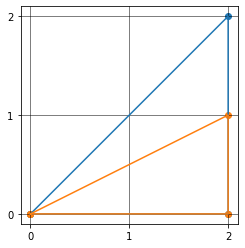

In [35]:
def triangle_plot(points, max_triangle_coor):
    '''
        Plots triangle from points (e.g. [(0, 0), (1, 0), (1, 1)])
    '''
    x = np.array([point[0] for point in points])
    y = np.array([point[1] for point in points])

    plt.plot(x, y)
    plt.scatter(x, y)

    initial_plot(max_triangle_coor)

    return plt


triangle_plot([(0, 0), (2, 0), (2, 2), (0, 0)], 2)
triangle_plot([(0, 0), (2, 0), (2, 1), (0, 0)], 2)

<AxesSubplot:>

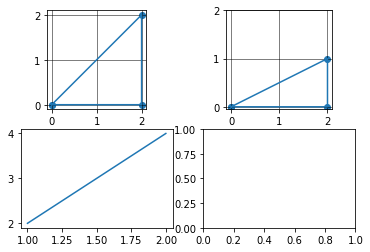

In [15]:
plt.figure(1)
plt.subplot(221)
triangle_plot([(0, 0), (2, 0), (2, 2), (0, 0)])
plt.subplot(222)
triangle_plot([(0, 0), (2, 0), (2, 1), (0, 0)])
plt.subplot(223)
plt.plot([1, 2], [2, 4])
plt.subplot(224)

In [24]:
import math

max_subplots = math.ceil(math.sqrt(len(right_triangles))) ** 2
nrows = ncols = int(math.sqrt(max_subplots))

max_subplots, nrows, ncols

(16, 4, 4)

<AxesSubplot:>

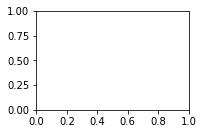

In [27]:
plt.subplot(2, 2, 1)

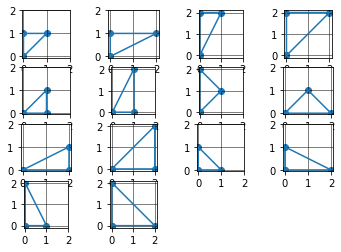

In [36]:
max_triangle_coor = max([max(triangle_coor) for triangle_coor in right_triangles])[0]

for triangle_coor in right_triangles:
    plt.subplot(nrows, ncols, right_triangles.index(triangle_coor) + 1)
    triangle_plot(triangle_coor + [(0, 0)], max_triangle_coor)

In [31]:
max_triangle_coor

(2, 2)